# P7 Machine Learning Phase 2-3

# 0 Chargement des bibliothèques et des données

##  0.1 Chargement des bibliothèques

In [62]:
# Import of pandas, numpy, pyplot and seaborn libraries

# Datasets analysis libraries 
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# math library
import math
import statistics

# warning management library
import warnings

# DOS like library
import os

# Date management
from datetime import *
from dateutil.relativedelta import *
from dateutil.parser import *

# ML
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


## 0.2 Settings

In [63]:
warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 0.3 Chargement des données

In [64]:
path = "DATA/df_10pc.csv"
# path_transformed='/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/transformed//'

In [65]:
# csv_train1=path_transformed+'df_train2.csv'
df=pd.read_csv(path)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_En

In [66]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'HOUSETYPE_MODE_terraced_house', 'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone__brick', 'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'], dtype='object', length=243)

In [67]:
select_features=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2']

### Travail avec 10% des données pour choisir le mailleur modèle

In [68]:
X=df[select_features]
# X=X.iloc[0:int(len(df)/10),:]

In [69]:
y=df['TARGET']
# y=y.iloc[0:int(len(df)/10)]

In [70]:
len(y)

30751

# 1 Machine Learning Phase 2

## 1.1 Grid_search_CV et différents scaler avec Random Forest

In [71]:
rfc=RandomForestClassifier(max_depth=10,random_state=0)
pipe = Pipeline([
        ('sampling', RandomUnderSampler()), ('scaler',StandardScaler()), 
        ('classification', rfc)
    ])

In [72]:
"""param_dict={'sampling' : [SMOTE(),RandomUnderSampler(), "passthrough"], 'scaler' : [RobustScaler(),MinMaxScaler(),
                                                                                   StandardScaler(),MaxAbsScaler(),
                                                                                    QuantileTransformer(),
                                                                                "passthrough"]}"""
param_dict={'sampling' : [RandomUnderSampler(), "passthrough"], 'scaler' : [RobustScaler(),
                                                                            StandardScaler(),
                                                                            QuantileTransformer(),
                                                                            "passthrough"]}

In [73]:
grid=GridSearchCV(pipe,param_dict,scoring='roc_auc',cv=5)
#result=grid.fit(X,y)

In [74]:
path_results='/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/results//'
csv_scores_rfc=path_results+'scores_rfc.csv'
scores_rfc=pd.read_csv(csv_scores_rfc)
#scores_rfc=pd.DataFrame(grid.cv_results_)
scores_rfc

FileNotFoundError: [Errno 2] No such file or directory: '/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/results//scores_rfc.csv'

In [75]:
path_results='/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/results//'
#scores_rfc.to_csv(path_results+'scores_rfc.csv', index=False)

## 1.2 LGBM Classifier avec plusieurs samplers et scalers 

In [91]:
lgbmc=LGBMClassifier(random_state=0)
pipe = Pipeline([
        ('sampling', RandomUnderSampler()), ('scaler',StandardScaler()), 
        ('classification', lgbmc)
    ])

In [92]:
param_dict={'sampling' : [SMOTE(),RandomUnderSampler(), "passthrough"], 'scaler' : [RobustScaler(),MinMaxScaler(),
                                                                                   StandardScaler(),MaxAbsScaler(),
                                                                                    QuantileTransformer(),
                                                                                "passthrough"]}

In [93]:
grid=GridSearchCV(pipe,param_dict,scoring='roc_auc',cv=5)
result=grid.fit(X,y)

In [94]:
scores_lgbmc_cwb=pd.DataFrame(grid.cv_results_)
scores_lgbmc_cwb.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sampling,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.134848,0.012047,0.011463,0.004175,passthrough,RobustScaler(),"{'sampling': 'passthrough', 'scaler': RobustSc...",0.698022,0.655580,0.672798,0.680219,0.661652,0.673654,0.014889,1
13,0.133993,0.017510,0.015351,0.007117,passthrough,MinMaxScaler(),"{'sampling': 'passthrough', 'scaler': MinMaxSc...",0.688666,0.660079,0.666732,0.691222,0.660331,0.673406,0.013736,2
16,0.170190,0.007198,0.028544,0.014114,passthrough,QuantileTransformer(),"{'sampling': 'passthrough', 'scaler': Quantile...",0.688671,0.660083,0.666750,0.691224,0.659981,0.673342,0.013802,3
14,0.131193,0.012872,0.016937,0.006271,passthrough,StandardScaler(),"{'sampling': 'passthrough', 'scaler': Standard...",0.695341,0.647989,0.663387,0.687098,0.671361,0.673035,0.016843,4
17,0.172363,0.092919,0.016782,0.006591,passthrough,passthrough,"{'sampling': 'passthrough', 'scaler': 'passthr...",0.685790,0.651149,0.672580,0.681679,0.671172,0.672474,0.011988,5


In [95]:
#scores_lgbmc=pd.DataFrame(grid.cv_results_)
csv_scores_lgbmc=path_results+'scores_lgbmc.csv'
scores_lgbmc=pd.read_csv(csv_scores_lgbmc)
scores_lgbmc

FileNotFoundError: [Errno 2] No such file or directory: '/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/results//scores_lgbmc.csv'

In [ ]:
#scores_lgbmc.to_csv(path_results+'scores_lgbmc.csv', index=False)

### Meilleur résultat pour lgbmc sans sampler avec RobustScaler

## 1.3 LGBM Classifier avec Robustscaler et class_weight='balanced'

In [99]:
X=df[select_features]
y=df['TARGET']

In [100]:
lgbmc_cwb=LGBMClassifier(class_weight='balanced')

In [101]:
pipe = Pipeline([
        ('scaler',RobustScaler()), 
        ('classification', lgbmc_cwb)
    ])

In [102]:
grid=GridSearchCV(pipe,{},scoring='roc_auc',cv=5)
result=grid.fit(X,y)

In [103]:
scores_lgbmc_cwb=pd.DataFrame(grid.cv_results_)
scores_lgbmc_cwb.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209702,0.085409,0.015047,0.006452,{},0.698108,0.658336,0.660024,0.687505,0.669252,0.674645,0.015651,1


### Nette Amélioration

In [29]:
yhat=grid.predict(X)
f1_sc=f1_score(y,yhat)
f1_sc

0.3607105170594443

## 1.4 Features of importance using shap and RandomForestClassifier

In [30]:
import shap
shap.initjs()

In [31]:
df_1=df[df['TARGET']==1]
len(df_1)

2464

In [32]:
df_0_tot=df[df['TARGET']==0]
df_0=df_0_tot[0:24820]

In [33]:
df_eq=pd.concat([df_1, df_0])
df_eq

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_En

In [34]:
y_eq=df_eq['TARGET']

In [35]:
X_eq=df_eq[select_features]

In [36]:
X_eq

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2
0,0,202500.0,406597.5,24700.5,351000.0,2,2,-9461,-637,0.262949
26,0,112500.0,979992.0,27076.5,702000.0,3,2,-18724,-2628,0.548477
40,0,202500.0,1193580.0,35028.0,855000.0,2,2,-17482,-1262,0.306841
42,0,135000.0,288873.0,16258.5,238500.0,3,3,-13384,-3597,0.674203
81,0,81000.0,252000.0,14593.5,252000.0,2,2,-24794,365243,0.023952
...,...,...,...,...,...,...,...,...,...,...
26968,0,135000.0,247500.0,19282.5,247500.0,2,2,-17423,-780,0.629838
26969,2,270000.0,550080.0,14638.5,360000.0,3,3,-14654,-375,0.436843
26970,1,67500.0,263340.0,7371.0,198000.0,2,2,-14136,-2415,0.708695
26971,0,112500.0,630000.0,31500.0,630000.0,1,1,-23079,365243,0.565064


In [37]:
rfc=RandomForestClassifier(random_state=0)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_eq, y_eq, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

In [39]:
rfc.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [40]:
yhat=rfc.predict(X_test)
f1_sc=f1_score(y_test,yhat)
f1_sc

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [41]:
auroc=roc_auc_score(y_test,yhat)
auroc

ValueError: Found input variables with inconsistent numbers of samples: [4093, 30751]

In [42]:
rfc_explainer1 = shap.TreeExplainer(rfc, X_train)

AssertionError: Model has no `estimators_`! Have you called `model.fit`?

In [43]:
sample_idx = 0

X_test_0=np.array(X_test.iloc[0,:])
shap_vals = rfc_explainer1.shap_values(X_test_0)

print("Base Value : ", rfc_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", rfc.predict(X_test_0.reshape(1,-1)))
print("Prediction From Adding SHAP Values to Base Value : ", rfc_explainer1.expected_value + np.array(shap_vals).sum())

NameError: name 'rfc_explainer1' is not defined

In [44]:
feature_names=list(X_eq.columns)
feature_names

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2']

In [45]:
shap.bar_plot(rfc_explainer1.shap_values(X_test_0)[1],
              feature_names=feature_names,
              max_display=len(feature_names))

NameError: name 'rfc_explainer1' is not defined

In [46]:
X_test_2=np.array(X_test.iloc[2,:])

In [47]:
shap.bar_plot(rfc_explainer1.shap_values(X_test_2)[1],
              feature_names=feature_names,
              max_display=len(feature_names))

NameError: name 'rfc_explainer1' is not defined

In [48]:
sample_idx = 2

X_test_2=np.array(X_test.iloc[sample_idx,:])
shap_vals = rfc_explainer1.shap_values(X_test_0)

print("Base Value : ", rfc_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", rfc.predict(X_test_2.reshape(1,-1)))
print("Prediction From Adding SHAP Values to Base Value : ", rfc_explainer1.expected_value + np.array(shap_vals).sum())

NameError: name 'rfc_explainer1' is not defined

## 1.5 Exportation du modèle lgbmc avec class_weight

In [49]:
import pickle

In [50]:
pickle_out=open(path_results+"lgbmcassifier.pkl","wb")
pickle.dump(grid,pickle_out)
pickle_out.close()

FileNotFoundError: [Errno 2] No such file or directory: '/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/results//lgbmcassifier.pkl'

### Tester d'abord sur 10% des données au départ, choisies élatoirement et puis partir sur les 100% avec modèle choisi (max time d'un run : 5 min)

### axxe d'amélioration : Utiliser un sample intelligent respectant la distribution (clusterscentroids, dans imblearn)

## 1.6 Features of importance avec LGBM Classifier avec Robustscaler et class_weight='balanced'


In [51]:
lgbmc=LGBMClassifier(class_weight='balanced', random_state=0)
pipe = Pipeline([
        ('scaler',RobustScaler()), 
        ('classification', lgbmc)])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

In [49]:
result=pipe.fit(X_train,y_train)

In [50]:
yhat=pipe.predict(X_test)
f1_sc=f1_score(y_test,yhat)
f1_sc

0.23770117276742653

In [51]:
auroc=roc_auc_score(y_test,yhat)
auroc

0.651748676872063

In [52]:
lgbmc_explainer1 = shap.TreeExplainer(lgbmc, X_train)

In [53]:
sample_idx = 0

X_test_0=np.array(X_test.iloc[0,:])
shap_vals = lgbmc_explainer1.shap_values(X_test_0)

print("Base Value : ", lgbmc_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lgbmc.predict(X_test_0.reshape(1,-1)))
print("Prediction From Adding SHAP Values to Base Value : ", lgbmc_explainer1.expected_value + np.array(shap_vals).sum())

Base Value :  -2.528795119592198

Shap Values for Sample 0 :  [-0.14022236  0.          0.          0.          0.          0.
  0.          0.          0.          0.3224306 ]


Prediction From Model                            :  [0]
Prediction From Adding SHAP Values to Base Value :  -2.346586879406334


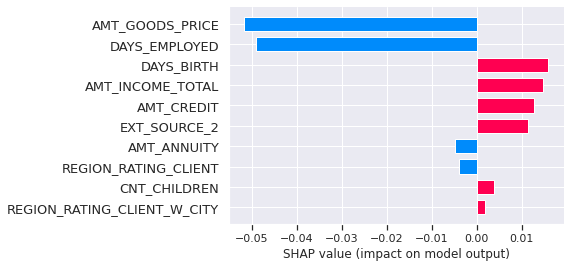

In [54]:
shap.bar_plot(rfc_explainer1.shap_values(X_test_0)[1],
              feature_names=feature_names,
              max_display=len(feature_names))

In [55]:
X_test_2=np.array(X_test.iloc[2,:])

In [56]:
sample_idx = 4

X_test_2=np.array(X_test.iloc[sample_idx,:])
shap_vals = lgbmc_explainer1.shap_values(X_test_2)

print("Base Value : ", lgbmc_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lgbmc.predict(X_test_2.reshape(1,-1)))
print("Prediction From Adding SHAP Values to Base Value : ", lgbmc_explainer1.expected_value + np.array(shap_vals).sum())

Base Value :  -2.528795119592198

Shap Values for Sample 4 :  [-0.13737369  0.          0.          0.          0.          0.
  0.          0.          0.         -0.18992593]


Prediction From Model                            :  [0]
Prediction From Adding SHAP Values to Base Value :  -2.856094734676392


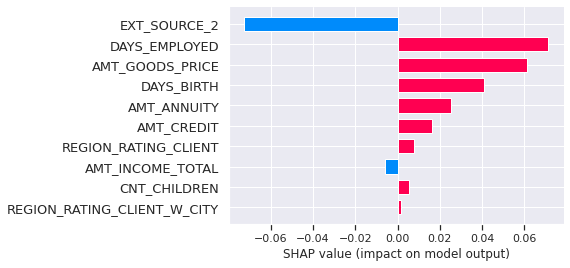

In [57]:
shap.bar_plot(rfc_explainer1.shap_values(X_test_2)[1],
              feature_names=feature_names,
              max_display=len(feature_names))

In [58]:
pickle_out=open(path_results+"robust_lgbmc.pkl","wb")
pickle.dump(lgbmc,pickle_out)
pickle_out.close()

In [59]:
pickle_out=open(path_results+"lgbmc_explainer.pkl","wb")
pickle.dump(lgbmc_explainer1,pickle_out)
pickle_out.close()

## 1.7 LGBM Classifier avec sampler clusterCentroids, class_weight='balanced'

In [60]:
from imblearn.under_sampling import ClusterCentroids

In [61]:
cc = ClusterCentroids(random_state=0)

In [62]:
X=df[select_features]
X=X.iloc[0:int(len(df)/10),:]

In [63]:
y=df['TARGET']
y=y.iloc[0:int(len(df)/10)]

In [64]:
X_resampled, y_resampled = cc.fit_resample(X, y)

In [65]:
len(y_resampled)

4928

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

In [67]:
result=lgbmc.fit(X_train,y_train)

In [68]:
yhat=lgbmc.predict(X_test)
f1_sc=f1_score(y_test,yhat)
f1_sc

0.9342465753424658

In [69]:
auroc=roc_auc_score(y_test,yhat)
auroc

0.9351351351351351

In [70]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

In [71]:
yhat=lgbmc.predict(X_test_2)
f1_sc=f1_score(y_test_2,yhat)
f1_sc

0.15940054495912806

In [72]:
auroc=roc_auc_score(y_test_2,yhat)
auroc

0.5533358805549025

In [73]:
X_4=[X_test_2.iloc[0,:]]
lgbmc.predict(X_4)[0]

0

In [74]:
X_sku=df.loc[(df['SK_ID_CURR']==100004), select_features]
lgbmc.predict(X_sku)[0]

1

In [75]:
result=lgbmc.predict_proba(X_sku)
result[0][0]

0.005407400065735701

In [76]:
pickle_out=open(path_results+"cc_lgbmc.pkl","wb")
pickle.dump(lgbmc,pickle_out)
pickle_out.close()

In [77]:
cc_lgbmc_explainer = shap.TreeExplainer(lgbmc, X_sku)

In [78]:
shap_values = cc_lgbmc_explainer(X_sku)

In [79]:
len(shap_values[0])

10

In [80]:
pickle_out=open(path_results+"cc_lgbmc_explainer.pkl","wb")
#pickle.dump(cc_lgbmc_explainer,pickle_out)
pickle_out.close()

In [81]:
lgbmc_2=LGBMClassifier(random_state=0)

In [82]:
result=lgbmc_2.fit(X_train,y_train)

In [83]:
yhat=lgbmc_2.predict(X_test)
auroc=roc_auc_score(y_test,yhat)
auroc

0.9351351351351351

In [84]:
yhat=lgbmc_2.predict(X_test_2)
auroc=roc_auc_score(y_test_2,yhat)
auroc

0.5533358805549025

### Class_weight='balanced' ne change rien au résultat dans ce cas là.

### Inclusion dans un pipeline et un dataset un peu plus grand

In [85]:
X=df[select_features]
X=X.iloc[0:int(len(df)/10),:]
y=df['TARGET']
y=y.iloc[0:int(len(df)/10)]

In [86]:
lgbmc=LGBMClassifier(random_state=0)
cc = ClusterCentroids(random_state=0)
pipe = Pipeline([('sampler', cc), 
        ('classification', lgbmc)])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

In [88]:
#result=pipe.fit(X_train,y_train)

In [89]:
#yhat=pipe.predict(X_test)
#f1_sc=f1_score(y_test,yhat)
f1_sc

0.15940054495912806

In [90]:
#auroc=roc_auc_score(y_test,yhat)
auroc

0.5533358805549025

# 2 Machine Learning Phase 3 : Prise en compte du dataset train complet

## 2.1 Dataset de train uniquement

In [91]:
csv_train1=path_transformed+'df_train_full.csv'
df=pd.read_csv(csv_train1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_En

In [92]:
old_names = df.columns.tolist()
new_names = []
for column_name in old_names:
    new_column_name=column_name.replace(' ','_')
    new_column_name=new_column_name.replace(':','_')
    new_column_name=new_column_name.replace(',','_')
    new_column_name=new_column_name.replace('/','_')
    new_names.append(new_column_name)
new_names

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_

In [93]:
df = df.rename(columns=dict(zip(old_names, new_names)))
y=df['TARGET']
X=df.drop(columns=['SK_ID_CURR','TARGET'])

In [94]:
path_transformed='/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/transformed//'
#df.to_csv(path_transformed+'df_train_full.csv', index=False)

In [95]:
lgbmc=LGBMClassifier(class_weight='balanced', random_state=0)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=0, shuffle=True)

In [97]:
result=lgbmc.fit(X_train,y_train)

In [98]:
yhat=lgbmc.predict(X_test)
auroc=roc_auc_score(y_test,yhat)
auroc

0.6893857266300772

In [99]:
f1_sc=f1_score(y_test,yhat)
f1_sc

0.26465354543003505

In [100]:
X_train_100=X_test.iloc[0:100,:]

In [101]:
path_api='/home/emma_sylvain/Formation_OpenClassrooms_DataScientist/Projet_7/api/MODEL/'

In [102]:
pickle_out=open(path_api+"lgbmc_final_V2.pkl","wb")
pickle.dump(lgbmc,pickle_out)
pickle_out.close()

In [103]:
lgbmc_explainer = shap.TreeExplainer(lgbmc, X_train)
pickle_out=open(path_api+"explainer_lgbmc_final_V2.pkl","wb")
pickle.dump(lgbmc_explainer,pickle_out)
pickle_out.close()

In [104]:
feature_names=list(X_train_100.columns)
feature_names

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG'

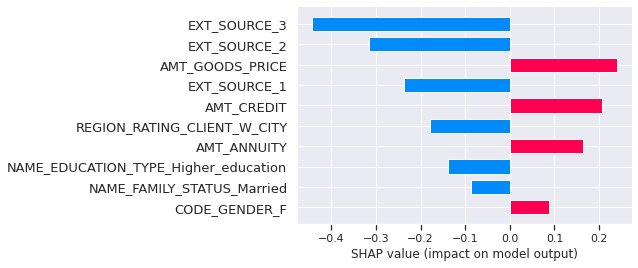

In [105]:
shap.bar_plot(lgbmc_explainer.shap_values(X_train_100)[1],
              feature_names=feature_names,
              max_display=10)#len(feature_names))

In [106]:
shap_value = lgbmc_explainer(X_train_100)[0]

In [107]:
shap_data=pd.DataFrame(np.array([abs(shap_value.values), shap_value.values, shap_value.data.round(3)]).T, 
                                  index=shap_value.feature_names, 
                                  columns=["SHAP_Strength","SHAP", "Data"])

In [108]:
shap_data.head()

,SHAP_Strength,SHAP,Data
NAME_CONTRACT_TYPE,0.035506,0.035506,0.0
FLAG_OWN_CAR,0.001743,0.001743,0.0
FLAG_OWN_REALTY,0.000078,-0.000078,0.0
CNT_CHILDREN,0.002170,0.002170,0.0
AMT_INCOME_TOTAL,0.000760,0.000760,117000.0


In [109]:
shap_data = shap_data.sort_values(by="SHAP_Strength", ascending=False)

In [110]:
shap_data_10 = shap_data.iloc[0:10,:]
shap_data_10

,SHAP_Strength,SHAP,Data
EXT_SOURCE_3,1.181696,1.181696,0.146
EXT_SOURCE_2,0.590518,0.590518,0.183
AMT_GOODS_PRICE,0.223524,0.223524,360000.000
REGION_RATING_CLIENT_W_CITY,0.096403,0.096403,3.000
DAYS_ID_PUBLISH,0.093184,-0.093184,-4653.000
DAYS_LAST_PHONE_CHANGE,0.047065,-0.047065,-2008.000
FLAG_WORK_PHONE,0.046180,0.046180,1.000
NAME_EDUCATION_TYPE_Higher_education,0.043373,0.043373,0.000
OWN_CAR_AGE,0.039746,0.039746,NaN
NAME_CONTRACT_TYPE,0.035506,0.035506,0.000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

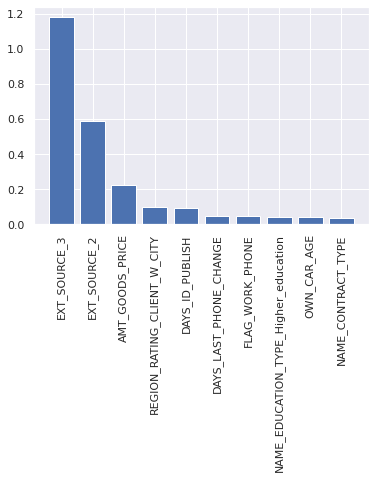

In [111]:
plt.bar(x=shap_data_10.index,height=shap_data_10['SHAP_Strength'])
plt.xticks(rotation = 90)

In [112]:
X_train_1000=X_test.iloc[0:1000,:]

In [113]:
shap_value = lgbmc_explainer(X_train_1000)[0]

In [114]:
shap_data=pd.DataFrame(np.array([abs(shap_value.values), shap_value.values, shap_value.data.round(3)]).T, 
                                  index=shap_value.feature_names, 
                                  columns=["SHAP_Strength","SHAP", "Data"])

In [115]:
shap_data = shap_data.sort_values(by="SHAP_Strength", ascending=False)

In [116]:
shap_data_10 = shap_data.iloc[0:10,:]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

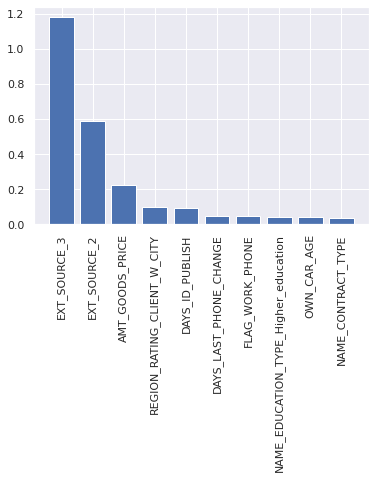

In [117]:
plt.bar(x=shap_data_10.index,height=shap_data_10['SHAP_Strength'])
plt.xticks(rotation = 90)